# Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import csv
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns #visualisation
sns.set(color_codes=True)

In [2]:
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)                  

# Load Data

In [3]:
df = pd.read_csv('D:\Study\Thesis\Q8\PDB_CLEAN_DATA.csv').sort_values(by=['pdb_id','chain_code'])
print(len(df))
# df.len.hist(bins=100)
# print(df.shape)

# def seq2ngrams(seqs, n=3):
#     return np.array([[seq[i:i+n] for i in range(len(seq))] for seq in seqs])

# maxlen_seq = 128
# input_seqs, target_seqs = df[['seq', 'sst3']][(df.len <= maxlen_seq) & (~df.has_nonstd_aa)].values.T
# input_grams = seq2ngrams(input_seqs)
# print(len(input_seqs))
df.head()

393732


,pdb_id,chain_code,seq,sst8,sst3,len,has_nonstd_aa
124730,101M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,CCCCHHHHHHHHHHHHHHGGGHHHHHHHHHHHHHHHCGGGGGGCTT...,CCCCHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHCHHHHHHCCC...,154,False
138377,102L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...,CCHHHHHHHHHCCEEEEEECTTSCEEEETTEEEESSSCTTTHHHHH...,CCHHHHHHHHHCCEEEEEECCCCCEEEECCEEEECCCCCCCHHHHH...,165,False
124731,102M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,CCCCHHHHHHHHHHHHHHGGGHHHHHHHHHHHHHHHCGGGGGGCTT...,CCCCHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHCHHHHHHCCC...,154,False
140434,103L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...,CCHHHHHHHHHCCEEEEEECTTSCEEEETTEECCCCCCCCCHHHHH...,CCHHHHHHHHHCCEEEEEECCCCCEEEECCEECCCCCCCCCHHHHH...,167,False
124732,103M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,CCCCHHHHHHHHHHHHHHGGGHHHHHHHHHHHHHHHCGGGGGGCTT...,CCCCHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHCHHHHHHCCC...,154,False


# Full Data Analysis

(393732, 7)


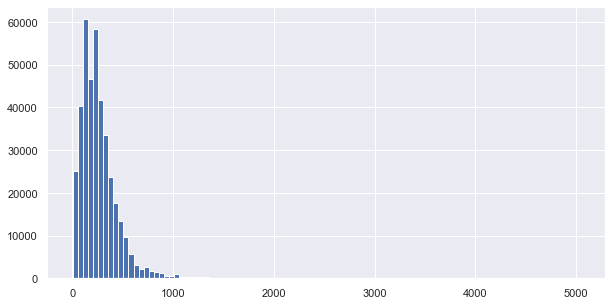

In [4]:
df.len.hist(bins=100,figsize=[10,5],)
print(df.shape)

# Clear invalid Data having '*'

In [10]:
def clear_asterisks(df, seqs_column_name, pct=0.00001):
    indices = []
    dropped = 0
    for i, seq in enumerate(df[seqs_column_name]):
        if (seq.count('*')*100/len(seq)) <= pct: indices.append(i)
#         else:
#           print(seq)
    return df.iloc[indices]

df = clear_asterisks(df,'seq')
df.shape

(386333, 7)

# Cleaned Data Analysis

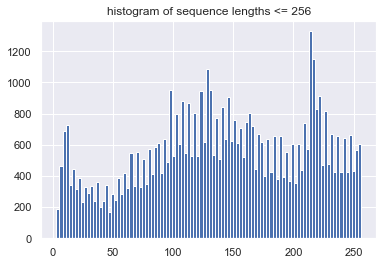

In [11]:
df1 = df[['seq','len','sst3','sst8']][(df['len']<=256)&(df['has_nonstd_aa']==False)]
df1.drop_duplicates(subset='seq',inplace=True)
plt.hist(x='len',data=df1,bins=100,histtype='bar');
plt.title('histogram of sequence lengths <= 256');

# Q3 Structure Count

dict_a:   {'C': 2958711, 'H': 3844017, 'E': 1307815}
dict_f:   {'C': 1364525, 'H': 1400272, 'E': 1190666}
dict_p:   {'C': 3450091, 'H': 834052, 'E': 429999}
dict_s:   {'C': 3549189, 'H': 1693692, 'E': 1151297}


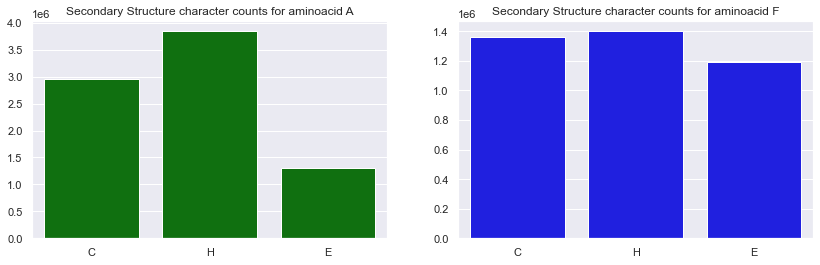

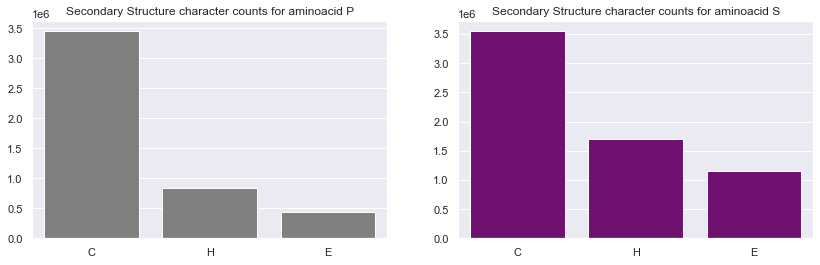

In [12]:
dict_a = {'C':[],'H':[],'E':[]}
dict_f = {'C':[],'H':[],'E':[]}
dict_p = {'C':[],'H':[],'E':[]}
dict_s = {'C':[],'H':[],'E':[]}

for se,sst in zip(df['seq'],df['sst3']):
    for s,ss in zip(se,sst):
        if s == 'A':
            if ss == 'C': dict_a['C'].append(1)
            elif ss == 'H': dict_a['H'].append(1)
            elif ss == 'E': dict_a['E'].append(1)
        elif s == 'F':        
            if ss == 'C': dict_f['C'].append(1)
            elif ss == 'H': dict_f['H'].append(1)
            elif ss == 'E': dict_f['E'].append(1)
        elif s == 'P':        
            if ss == 'C': dict_p['C'].append(1)
            elif ss == 'H': dict_p['H'].append(1)
            elif ss == 'E': dict_p['E'].append(1)
        elif s == 'S':        
            if ss == 'C': dict_s['C'].append(1)
            elif ss == 'H': dict_s['H'].append(1)
            elif ss == 'E': dict_s['E'].append(1)
                
                
for k in dict_a.keys(): dict_a[k] = sum(dict_a[k])
for k in dict_f.keys(): dict_f[k] = sum(dict_f[k])
for k in dict_p.keys(): dict_p[k] = sum(dict_p[k])
for k in dict_s.keys(): dict_s[k] = sum(dict_s[k])
print('dict_a:  ',dict_a)
print('dict_f:  ',dict_f)
print('dict_p:  ',dict_p)
print('dict_s:  ',dict_s)


plt.figure(figsize=(14,4));
plt.subplot(1,2,1);
sns.barplot(x=list(dict_a.keys()),y=list(dict_a.values()),color='green');
plt.title('Secondary Structure character counts for aminoacid A');
plt.subplot(1,2,2);
sns.barplot(x=list(dict_f.keys()),y=list(dict_f.values()),color='blue');
plt.title('Secondary Structure character counts for aminoacid F');
plt.figure(figsize=(14,4));
plt.subplot(1,2,1);
sns.barplot(x=list(dict_p.keys()),y=list(dict_p.values()),color='gray');
plt.title('Secondary Structure character counts for aminoacid P');
plt.subplot(1,2,2);
sns.barplot(x=list(dict_s.keys()),y=list(dict_s.values()),color='purple');
plt.title('Secondary Structure character counts for aminoacid S');

# Q8 Structure Count

dict_a:   {'C': 1761874, 'E': 1251298, 'H': 3555768, 'B': 56517, 'G': 287048, 'I': 1201, 'T': 692613, 'S': 504224}
dict_f:   {'C': 791362, 'E': 1122680, 'H': 1249766, 'B': 67986, 'G': 149276, 'I': 1230, 'T': 297825, 'S': 275338}
dict_p:   {'C': 2213726, 'E': 379475, 'H': 605613, 'B': 50524, 'G': 227993, 'I': 446, 'T': 769222, 'S': 467143}
dict_s:   {'C': 2156131, 'E': 1079518, 'H': 1425388, 'B': 71779, 'G': 267397, 'I': 907, 'T': 723520, 'S': 669538}
dict_n:   {'C': 1266614, 'E': 519772, 'H': 972454, 'B': 49287, 'G': 159520, 'I': 698, 'T': 759951, 'S': 520902}
dict_q:   {'C': 915759, 'E': 600640, 'H': 1475081, 'B': 38058, 'G': 131551, 'I': 521, 'T': 373465, 'S': 296269}
dict_l:   {'C': 1754747, 'E': 2059303, 'H': 3836122, 'B': 108048, 'G': 289810, 'I': 2722, 'T': 590773, 'S': 489876}
dict_v:   {'C': 1416527, 'E': 2714794, 'H': 2098707, 'B': 109049, 'G': 109020, 'I': 1806, 'T': 302447, 'S': 362964}


Text(0.5, 1.0, 'Secondary Structure character counts for aminoacid V')

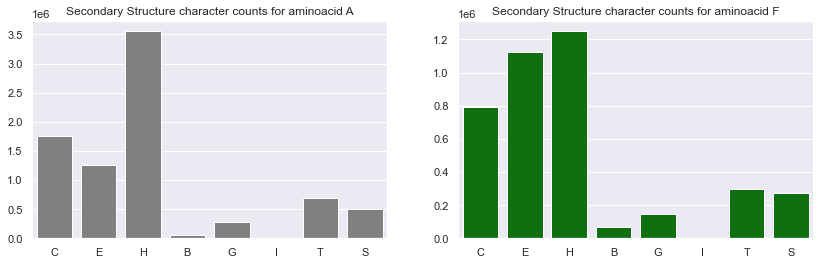

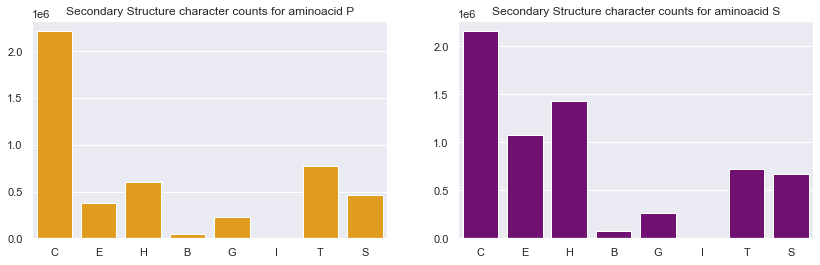

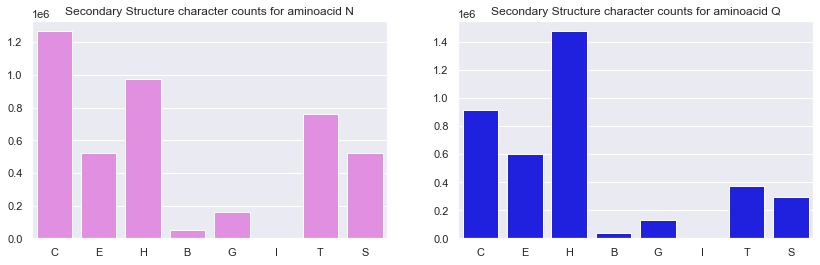

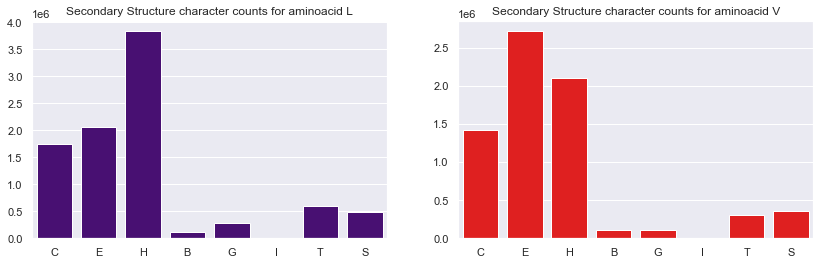

In [14]:
dict_a = {'C':[],'E':[],'H':[],'B':[],'G':[],'I':[],'T':[],'S':[]}
dict_f = {'C':[],'E':[],'H':[],'B':[],'G':[],'I':[],'T':[],'S':[]}
dict_p = {'C':[],'E':[],'H':[],'B':[],'G':[],'I':[],'T':[],'S':[]}
dict_s = {'C':[],'E':[],'H':[],'B':[],'G':[],'I':[],'T':[],'S':[]}
dict_n = {'C':[],'E':[],'H':[],'B':[],'G':[],'I':[],'T':[],'S':[]}
dict_q = {'C':[],'E':[],'H':[],'B':[],'G':[],'I':[],'T':[],'S':[]}
dict_l = {'C':[],'E':[],'H':[],'B':[],'G':[],'I':[],'T':[],'S':[]}
dict_v = {'C':[],'E':[],'H':[],'B':[],'G':[],'I':[],'T':[],'S':[]}

for se,sst in zip(df['seq'],df['sst8']):
    for s,ss in zip(se,sst):
        if s == 'A':
            dict_a[ss].append(1)
        elif s == 'F':        
            dict_f[ss].append(1)
        elif s == 'P':        
            dict_p[ss].append(1)
        elif s == 'S':        
            dict_s[ss].append(1)
        elif s == 'N':        
            dict_n[ss].append(1)
        elif s == 'Q':        
            dict_q[ss].append(1)
        elif s == 'L':        
            dict_l[ss].append(1)
        elif s == 'V':        
            dict_v[ss].append(1)
                
for k in dict_a.keys(): dict_a[k] = sum(dict_a[k])
for k in dict_f.keys(): dict_f[k] = sum(dict_f[k])
for k in dict_p.keys(): dict_p[k] = sum(dict_p[k])
for k in dict_s.keys(): dict_s[k] = sum(dict_s[k])
for k in dict_n.keys(): dict_n[k] = sum(dict_n[k])
for k in dict_q.keys(): dict_q[k] = sum(dict_q[k])
for k in dict_l.keys(): dict_l[k] = sum(dict_l[k])
for k in dict_v.keys(): dict_v[k] = sum(dict_v[k])
print('dict_a:  ',dict_a)
print('dict_f:  ',dict_f)
print('dict_p:  ',dict_p)
print('dict_s:  ',dict_s)
print('dict_n:  ',dict_n)
print('dict_q:  ',dict_q)
print('dict_l:  ',dict_l)
print('dict_v:  ',dict_v)


plt.figure(figsize=(14,4));
plt.subplot(1,2,1);
sns.barplot(x=list(dict_a.keys()),y=list(dict_a.values()),color='gray');
plt.title('Secondary Structure character counts for aminoacid A');
plt.subplot(1,2,2);
sns.barplot(x=list(dict_f.keys()),y=list(dict_f.values()),color='green');
plt.title('Secondary Structure character counts for aminoacid F');
plt.figure(figsize=(14,4));
plt.subplot(1,2,1);
sns.barplot(x=list(dict_p.keys()),y=list(dict_p.values()),color='orange');
plt.title('Secondary Structure character counts for aminoacid P');
plt.subplot(1,2,2);
sns.barplot(x=list(dict_s.keys()),y=list(dict_s.values()),color='purple');
plt.title('Secondary Structure character counts for aminoacid S');
plt.figure(figsize=(14,4));
plt.subplot(1,2,1);
sns.barplot(x=list(dict_n.keys()),y=list(dict_n.values()),color='violet');
plt.title('Secondary Structure character counts for aminoacid N');
plt.subplot(1,2,2);
sns.barplot(x=list(dict_q.keys()),y=list(dict_q.values()),color='blue');
plt.title('Secondary Structure character counts for aminoacid Q');
plt.figure(figsize=(14,4));
plt.subplot(1,2,1);
sns.barplot(x=list(dict_l.keys()),y=list(dict_l.values()),color='indigo');
plt.title('Secondary Structure character counts for aminoacid L');
plt.subplot(1,2,2);
sns.barplot(x=list(dict_v.keys()),y=list(dict_v.values()),color='red');
plt.title('Secondary Structure character counts for aminoacid V')

# Amino Acid Count for Q3 

dict_c:   {'A': 2958711, 'R': 2198148, 'N': 2547467, 'D': 3329527, 'C': 552910, 'Q': 1585493, 'G': 5212271, 'E': 2695372, 'H': 1498590, 'I': 1546301, 'L': 2835396, 'K': 2721765, 'M': 936800, 'F': 1364525, 'P': 3450091, 'S': 3549189, 'T': 2715820, 'W': 441584, 'Y': 1209830, 'V': 2081938, '*': 0}
dict_h:   {'A': 3844017, 'R': 2093708, 'N': 1132672, 'D': 1714467, 'C': 400056, 'Q': 1607153, 'G': 1257731, 'E': 3062460, 'H': 742338, 'I': 2112918, 'L': 4128654, 'K': 2255832, 'M': 969599, 'F': 1400272, 'P': 834052, 'S': 1693692, 'T': 1489707, 'W': 531055, 'Y': 1189441, 'V': 2209533, '*': 0}
dict_e:   {'A': 1307815, 'R': 956131, 'N': 569059, 'D': 665040, 'C': 416318, 'Q': 638698, 'G': 1052559, 'E': 943221, 'H': 484611, 'I': 2026729, 'L': 2167351, 'K': 1003252, 'M': 472818, 'F': 1190666, 'P': 429999, 'S': 1151297, 'T': 1456465, 'W': 384234, 'Y': 1081356, 'V': 2823843, '*': 0}


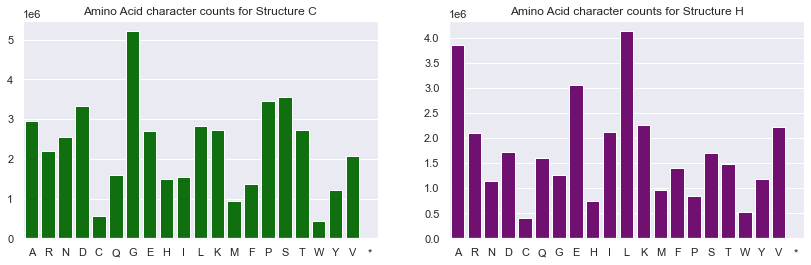

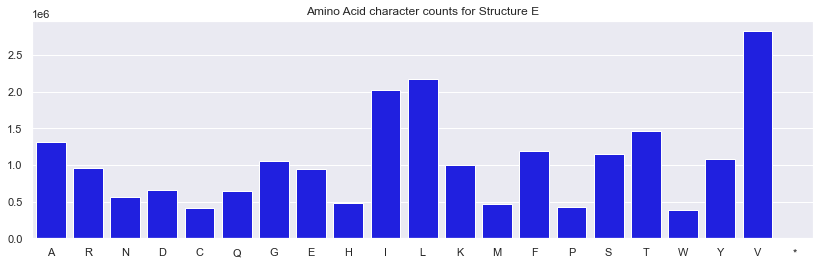

In [15]:
dict_c = {'A':[],'R':[],'N':[],'D':[],'C':[],'Q':[],'G':[],'E':[],'H':[],'I':[],'L':[],'K':[],'M':[],'F':[],'P':[],'S':[],'T':[],'W':[],'Y':[],'V':[],'*':[]}
dict_h = {'A':[],'R':[],'N':[],'D':[],'C':[],'Q':[],'G':[],'E':[],'H':[],'I':[],'L':[],'K':[],'M':[],'F':[],'P':[],'S':[],'T':[],'W':[],'Y':[],'V':[],'*':[]}
dict_e = {'A':[],'R':[],'N':[],'D':[],'C':[],'Q':[],'G':[],'E':[],'H':[],'I':[],'L':[],'K':[],'M':[],'F':[],'P':[],'S':[],'T':[],'W':[],'Y':[],'V':[],'*':[]}

for se,sst in zip(df['seq'],df['sst3']):
    for s,ss in zip(se,sst):
        if ss == 'C':
            dict_c[s].append(1)
        elif ss == 'H':        
            dict_h[s].append(1)
        elif ss == 'E':        
            dict_e[s].append(1)
                
                
for k in dict_c.keys(): dict_c[k] = sum(dict_c[k])
for k in dict_h.keys(): dict_h[k] = sum(dict_h[k])
for k in dict_e.keys(): dict_e[k] = sum(dict_e[k])

print('dict_c:  ',dict_c)
print('dict_h:  ',dict_h)
print('dict_e:  ',dict_e)
# print('dict_s:  ',dict_s)


plt.figure(figsize=(14,4));
plt.subplot(1,2,1);
sns.barplot(x=list(dict_c.keys()),y=list(dict_c.values()),color='green');
plt.title('Amino Acid character counts for Structure C');
plt.subplot(1,2,2);
sns.barplot(x=list(dict_h.keys()),y=list(dict_h.values()),color='purple');
plt.title('Amino Acid character counts for Structure H');
plt.figure(figsize=(14,4));
plt.subplot(1,1,1);
sns.barplot(x=list(dict_e.keys()),y=list(dict_e.values()),color='blue');
plt.title('Amino Acid character counts for Structure E');
# plt.subplot(1,2,2);
# sns.barplot(x=list(dict_s.keys()),y=list(dict_s.values()),color='gray');
# plt.title('Secondary Structure character counts for aminoacid S');

# Amino Acid Count for Q8 

dict_c:   {'A': 1761874, 'R': 1240973, 'N': 1266614, 'D': 1814620, 'C': 350541, 'Q': 915759, 'G': 2121415, 'E': 1430037, 'H': 1000681, 'I': 1042929, 'L': 1754747, 'K': 1485904, 'M': 659760, 'F': 791362, 'P': 2213726, 'S': 2156131, 'T': 1682101, 'W': 243948, 'Y': 680227, 'V': 1416527, '*': 0}
dict_h:   {'A': 3555768, 'R': 1917500, 'N': 972454, 'D': 1447208, 'C': 359564, 'Q': 1475081, 'G': 1054163, 'E': 2770332, 'H': 644316, 'I': 2000289, 'L': 3836122, 'K': 2048139, 'M': 904032, 'F': 1249766, 'P': 605613, 'S': 1425388, 'T': 1355895, 'W': 460420, 'Y': 1060361, 'V': 2098707, '*': 0}
dict_e:   {'A': 1251298, 'R': 893586, 'N': 519772, 'D': 613466, 'C': 391551, 'Q': 600640, 'G': 988425, 'E': 900228, 'H': 452357, 'I': 1939162, 'L': 2059303, 'K': 945374, 'M': 446634, 'F': 1122680, 'P': 379475, 'S': 1079518, 'T': 1373572, 'W': 363082, 'Y': 1015996, 'V': 2714794, '*': 0}
dict_g:   {'A': 287048, 'R': 175253, 'N': 159520, 'D': 265920, 'C': 40108, 'Q': 131551, 'G': 201220, 'E': 290765, 'H': 97479, '

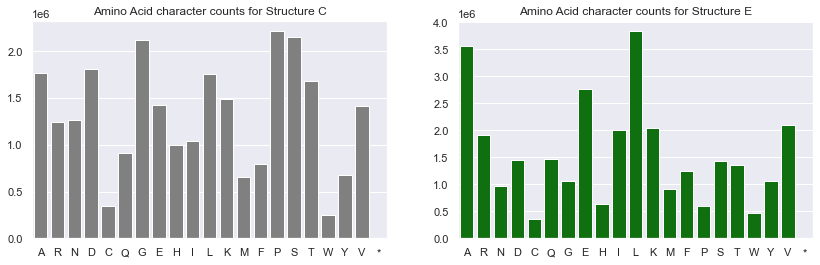

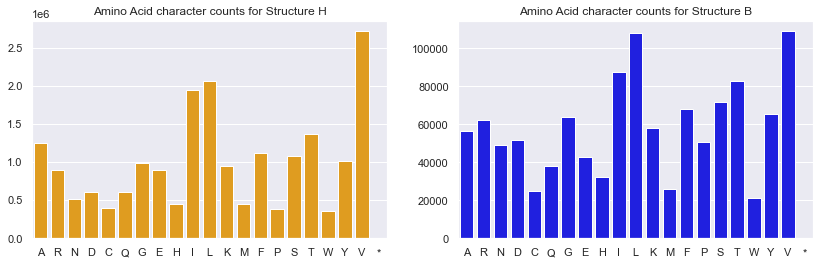

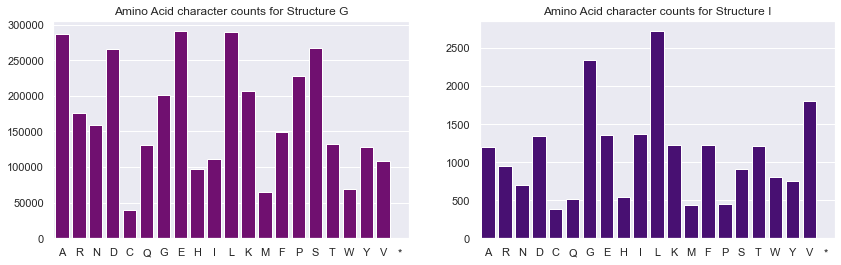

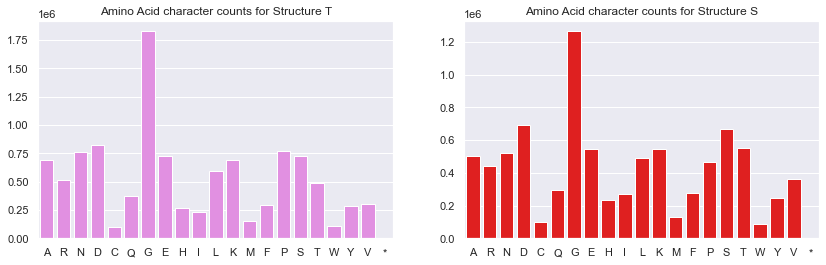

In [16]:
# from pandas.core.internals.construction import dict_to_mgr
dict_c = {'A':[],'R':[],'N':[],'D':[],'C':[],'Q':[],'G':[],'E':[],'H':[],'I':[],'L':[],'K':[],'M':[],'F':[],'P':[],'S':[],'T':[],'W':[],'Y':[],'V':[],'*':[]}
dict_e = {'A':[],'R':[],'N':[],'D':[],'C':[],'Q':[],'G':[],'E':[],'H':[],'I':[],'L':[],'K':[],'M':[],'F':[],'P':[],'S':[],'T':[],'W':[],'Y':[],'V':[],'*':[]}
dict_h = {'A':[],'R':[],'N':[],'D':[],'C':[],'Q':[],'G':[],'E':[],'H':[],'I':[],'L':[],'K':[],'M':[],'F':[],'P':[],'S':[],'T':[],'W':[],'Y':[],'V':[],'*':[]}
dict_b = {'A':[],'R':[],'N':[],'D':[],'C':[],'Q':[],'G':[],'E':[],'H':[],'I':[],'L':[],'K':[],'M':[],'F':[],'P':[],'S':[],'T':[],'W':[],'Y':[],'V':[],'*':[]}
dict_g = {'A':[],'R':[],'N':[],'D':[],'C':[],'Q':[],'G':[],'E':[],'H':[],'I':[],'L':[],'K':[],'M':[],'F':[],'P':[],'S':[],'T':[],'W':[],'Y':[],'V':[],'*':[]}
dict_i = {'A':[],'R':[],'N':[],'D':[],'C':[],'Q':[],'G':[],'E':[],'H':[],'I':[],'L':[],'K':[],'M':[],'F':[],'P':[],'S':[],'T':[],'W':[],'Y':[],'V':[],'*':[]}
dict_t = {'A':[],'R':[],'N':[],'D':[],'C':[],'Q':[],'G':[],'E':[],'H':[],'I':[],'L':[],'K':[],'M':[],'F':[],'P':[],'S':[],'T':[],'W':[],'Y':[],'V':[],'*':[]}
dict_s = {'A':[],'R':[],'N':[],'D':[],'C':[],'Q':[],'G':[],'E':[],'H':[],'I':[],'L':[],'K':[],'M':[],'F':[],'P':[],'S':[],'T':[],'W':[],'Y':[],'V':[],'*':[]}

for se,sst in zip(df['seq'],df['sst8']):
    for s,ss in zip(se,sst):
        if ss == 'C':
            dict_c[s].append(1)
        elif ss == 'H':        
            dict_h[s].append(1)
        elif ss == 'E':        
            dict_e[s].append(1)
        elif ss == 'B':        
            dict_b[s].append(1)
        elif ss == 'G':        
            dict_g[s].append(1)
        elif ss == 'I':        
            dict_i[s].append(1)
        elif ss == 'T':        
            dict_t[s].append(1)
        elif ss == 'S':        
            dict_s[s].append(1)
                
for k in dict_c.keys(): dict_c[k] = sum(dict_c[k])
for k in dict_h.keys(): dict_h[k] = sum(dict_h[k])
for k in dict_e.keys(): dict_e[k] = sum(dict_e[k])
for k in dict_g.keys(): dict_g[k] = sum(dict_g[k])
for k in dict_b.keys(): dict_b[k] = sum(dict_b[k])
for k in dict_i.keys(): dict_i[k] = sum(dict_i[k])
for k in dict_t.keys(): dict_t[k] = sum(dict_t[k])
for k in dict_s.keys(): dict_s[k] = sum(dict_s[k])

print('dict_c:  ',dict_c)
print('dict_h:  ',dict_h)
print('dict_e:  ',dict_e)
print('dict_g:  ',dict_g)
print('dict_b:  ',dict_b)
print('dict_i:  ',dict_i)
print('dict_t:  ',dict_t)
print('dict_s:  ',dict_s)


plt.figure(figsize=(14,4));
plt.subplot(1,2,1);
sns.barplot(x=list(dict_c.keys()),y=list(dict_c.values()),color='gray');
plt.title('Amino Acid character counts for Structure C');
plt.subplot(1,2,2);
sns.barplot(x=list(dict_e.keys()),y=list(dict_h.values()),color='green');
plt.title('Amino Acid character counts for Structure E');
plt.figure(figsize=(14,4));
plt.subplot(1,2,1);
sns.barplot(x=list(dict_h.keys()),y=list(dict_e.values()),color='orange');
plt.title('Amino Acid character counts for Structure H');
plt.subplot(1,2,2);
sns.barplot(x=list(dict_b.keys()),y=list(dict_b.values()),color='blue');
plt.title('Amino Acid character counts for Structure B');
plt.figure(figsize=(14,4));
plt.subplot(1,2,1);
sns.barplot(x=list(dict_g.keys()),y=list(dict_g.values()),color='purple');
plt.title('Amino Acid character counts for Structure G');
plt.subplot(1,2,2);
sns.barplot(x=list(dict_i.keys()),y=list(dict_i.values()),color='indigo');
plt.title('Amino Acid character counts for Structure I');
plt.figure(figsize=(14,4));
plt.subplot(1,2,1);
sns.barplot(x=list(dict_t.keys()),y=list(dict_t.values()),color='violet');
plt.title('Amino Acid character counts for Structure T');
plt.subplot(1,2,2);
sns.barplot(x=list(dict_s.keys()),y=list(dict_s.values()),color='red');
plt.title('Amino Acid character counts for Structure S');

# PreProcessing

In [29]:
raw_primary = []
raw_secondary = []
#lines=393732;
lines=10000;
#df=pd.read_csv('PDB_CLEAN_DATA.csv')
#display(df)
with open('D:\Study\Thesis\Q8\PDB_CLEAN_DATA.csv') as csv_file:
	csv_reader = csv.reader(csv_file, delimiter=',')
	line_count = 0
	for row in csv_reader:
		add = True
		if line_count == 0:
			line_count += 1
		elif line_count > lines:
			break;
		else:
			for j in range(len(row[2])):
				if row[2][j] == '*':
					#print(line_count)
					add = False
					break;
			if add == True:
				if(len(row)>=4):
					raw_primary.append( row[2] )
					raw_secondary.append( row[4] )

			line_count += 1
	print(f'Processed {line_count} lines.')

Processed 10001 lines.


In [30]:
for i, val in enumerate(raw_primary[0:20]):
  print(str(i) + " " + val)


0 EDL
1 KCK
2 KAK
3 KFK
4 KAK
5 KMK
6 KHK
7 KIK
8 KAK
9 KGK
10 KGK
11 KFK
12 KPK
13 KAK
14 KDK
15 KSK
16 KTK
17 KYK
18 KAK
19 KNK


In [31]:
for i in range(len(raw_secondary)):
	len1 = len(raw_secondary[i])
	len2 = len(raw_primary[i])
	if(len1 != len2):
	  print(i," ", raw_secondary[i]," ",raw_primary[i])

In [32]:
def split(sequence):
  return [char for char in sequence]


In [33]:
split_primary = []
split_secondary = []
for i in range(len(raw_primary)):
  split_primary.append(split(raw_primary[i]))
  split_secondary.append(split(raw_secondary[i]))

In [34]:
def orthogonal_primary(arg):
  switch = {
  'A' : np.array([1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]),
  'C' : np.array([0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]),
  'E' : np.array([0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]),
  'D' : np.array([0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]),
  'G' : np.array([0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]),
  'F' : np.array([0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0]),
  'I' : np.array([0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0]),
  'H' : np.array([0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0]),
  'K' : np.array([0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0]),
  'M' : np.array([0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0]),
  'L' : np.array([0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0]),
  'N' : np.array([0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0]),
  'Q' : np.array([0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0]),
  'P' : np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0]),
  'S' : np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0]),
  'R' : np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0]),
  'T' : np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0]),
  'W' : np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0]),
  'V' : np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]),
  'Y' : np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1])
  }
  return switch.get(arg)


In [35]:
def orthogonal_secondary(arg):
  switch = {
  'H' : 0,
  'C' : 1,
  'E' : 2
  }
  return switch.get(arg)

In [36]:
for i in range(len(split_primary)):
  seq = split_primary[i]
  for j in range(len(seq)):
    seq[j] = orthogonal_primary(seq[j])

In [37]:
for i in range(len(split_secondary)):
  seq2 = split_secondary[i]
  for j in range(len(seq2)):
    seq2[j] = orthogonal_secondary(seq2[j])


In [38]:
def target(lis):
  Y = []
  print(len(lis))
  for i in range(len(lis)):
    for j in range(len(lis[i])):
      Y.append(lis[i][j])
  return Y


In [39]:
y_label = target(split_secondary)

7366


In [40]:
y_label = np.array(y_label)

In [41]:
def window_padding_data(size, sequence):
	num = int(size/2)
	zeros = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

	for i in range(len(sequence)):
		for j in range(num):
			sequence[i].append(zeros)
			sequence[i].insert(0, zeros)
	X = []
	temp = []
	for k in range(len(sequence)):
		for l in range(len( sequence[k])-(size-1) ):
			temp = sequence[k][l:l+size]
			X.append(temp)
			temp = []
	return X

In [42]:
X = window_padding_data(17,split_primary)

In [43]:
X = np.array(X)

In [44]:
X.shape

(82487, 17, 20)

In [89]:
print(X_train)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [45]:
p=X.shape
X = X.reshape(p[0], 17*20)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size = 0.30)

# RBF kernel

In [47]:
svc = SVC(kernel='rbf', gamma = 0.1, C=2.5)
svc.fit(X_train, y_train)

SVC(C=2.5, gamma=0.1)

In [48]:
y_pred = svc.predict(X_train)
y_true = y_train
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      8861
           1       0.97      0.98      0.97     41739
           2       0.95      0.91      0.93      7140

    accuracy                           0.96     57740
   macro avg       0.95      0.94      0.94     57740
weighted avg       0.96      0.96      0.96     57740



In [49]:
y_pred = svc.predict(X_test)
y_true = y_test
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.83      0.86      3819
           1       0.93      0.96      0.94     17778
           2       0.89      0.77      0.83      3150

    accuracy                           0.92     24747
   macro avg       0.90      0.85      0.88     24747
weighted avg       0.92      0.92      0.92     24747



# Input and Output

In [97]:
p=X.shape
X = X.reshape(p[0], 17*20)
print(X[0])
y_pred = svc.predict([X[0]])
y_true = [y_test[0]]
print(classification_report(y_true,y_pred))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



# Sigmoid kernel

In [51]:
svc = SVC(kernel='sigmoid', gamma = 0.1, C=2.5)
svc.fit(X_train, y_train)

SVC(C=2.5, gamma=0.1, kernel='sigmoid')

In [52]:
print("Training Accuracy: ")
y_pred = svc.predict(X_train)
y_true = y_train
print(classification_report(y_true,y_pred))

Training Accuracy: 
              precision    recall  f1-score   support

           0       0.48      0.56      0.52      8861
           1       0.79      0.78      0.79     41739
           2       0.16      0.13      0.14      7140

    accuracy                           0.67     57740
   macro avg       0.48      0.49      0.48     57740
weighted avg       0.66      0.67      0.67     57740



In [53]:
print("Testing Accuracy: ")
y_pred = svc.predict(X_test)
y_true = y_test
print(classification_report(y_true,y_pred))

Testing Accuracy: 
              precision    recall  f1-score   support

           0       0.47      0.56      0.51      3819
           1       0.79      0.78      0.79     17778
           2       0.17      0.14      0.15      3150

    accuracy                           0.67     24747
   macro avg       0.48      0.49      0.48     24747
weighted avg       0.66      0.67      0.66     24747



# Polynomial kernel

In [54]:
svc = SVC(kernel='poly', gamma = 0.1, C=2.5)
svc.fit(X_train, y_train)

SVC(C=2.5, gamma=0.1, kernel='poly')

In [55]:
y_pred = svc.predict(X_train)
y_true = y_train
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      8861
           1       0.97      0.98      0.97     41739
           2       0.95      0.88      0.92      7140

    accuracy                           0.96     57740
   macro avg       0.95      0.94      0.94     57740
weighted avg       0.96      0.96      0.96     57740



In [56]:
y_pred = svc.predict(X_test)
y_true = y_test
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.80      0.85      3819
           1       0.92      0.96      0.94     17778
           2       0.89      0.74      0.81      3150

    accuracy                           0.91     24747
   macro avg       0.90      0.84      0.86     24747
weighted avg       0.91      0.91      0.91     24747



# Linear

In [57]:
svc = SVC(kernel='linear', gamma = 0.1, C=2.5)
svc.fit(X_train, y_train)

SVC(C=2.5, gamma=0.1, kernel='linear')

In [58]:
y_pred = svc.predict(X_train)
y_true = y_train
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.69      0.74      8861
           1       0.83      0.96      0.89     41739
           2       0.80      0.22      0.35      7140

    accuracy                           0.83     57740
   macro avg       0.81      0.62      0.66     57740
weighted avg       0.82      0.83      0.80     57740



In [59]:
y_pred = svc.predict(X_test)
y_true = y_test
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.70      0.74      3819
           1       0.83      0.96      0.89     17778
           2       0.79      0.21      0.34      3150

    accuracy                           0.82     24747
   macro avg       0.81      0.62      0.66     24747
weighted avg       0.82      0.82      0.80     24747



# Hyper-Parameter tuning

In [60]:
svc = SVC(kernel='rbf', gamma = 0.1, C=1.5)
svc.fit(X_train, y_train)
print("Training Accuracy: ")
y_pred = svc.predict(X_train)
y_true = y_train
print(classification_report(y_true,y_pred))
print("Testing Accuracy: ")
y_pred = svc.predict(X_test)
y_true = y_test
print(classification_report(y_true,y_pred))

Training Accuracy: 
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      8861
           1       0.96      0.98      0.97     41739
           2       0.95      0.85      0.90      7140

    accuracy                           0.95     57740
   macro avg       0.94      0.92      0.93     57740
weighted avg       0.95      0.95      0.95     57740

Testing Accuracy: 
              precision    recall  f1-score   support

           0       0.89      0.82      0.85      3819
           1       0.92      0.96      0.94     17778
           2       0.90      0.74      0.81      3150

    accuracy                           0.91     24747
   macro avg       0.90      0.84      0.87     24747
weighted avg       0.91      0.91      0.91     24747



In [61]:
svc = SVC(kernel='rbf', gamma = 0.01, C=3.5)
svc.fit(X_train, y_train)
print("Training Accuracy: ")
y_pred = svc.predict(X_train)
y_true = y_train
print(classification_report(y_true,y_pred))
print("Testing Accuracy: ")
y_pred = svc.predict(X_test)
y_true = y_test
print(classification_report(y_true,y_pred))

Training Accuracy: 
              precision    recall  f1-score   support

           0       0.87      0.73      0.80      8861
           1       0.85      0.98      0.91     41739
           2       0.95      0.30      0.45      7140

    accuracy                           0.85     57740
   macro avg       0.89      0.67      0.72     57740
weighted avg       0.86      0.85      0.83     57740

Testing Accuracy: 
              precision    recall  f1-score   support

           0       0.86      0.73      0.79      3819
           1       0.84      0.97      0.90     17778
           2       0.93      0.28      0.43      3150

    accuracy                           0.85     24747
   macro avg       0.88      0.66      0.71     24747
weighted avg       0.86      0.85      0.82     24747



In [21]:
svc = SVC(kernel='rbf', gamma = 0.1, C=3.0)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
y_true = y_test
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      3758
           1       0.93      0.96      0.94     17870
           2       0.89      0.77      0.83      3119

    accuracy                           0.92     24747
   macro avg       0.90      0.86      0.87     24747
weighted avg       0.92      0.92      0.92     24747



In [22]:
svc = SVC(kernel='rbf', gamma = 0.1, C=3.5)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
y_true = y_test
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      3758
           1       0.93      0.96      0.94     17870
           2       0.89      0.78      0.83      3119

    accuracy                           0.92     24747
   macro avg       0.90      0.86      0.88     24747
weighted avg       0.92      0.92      0.92     24747



In [23]:
svc = SVC(kernel='rbf', gamma = 0.1, C=4.0)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
y_true = y_test
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      3758
           1       0.93      0.96      0.94     17870
           2       0.89      0.78      0.83      3119

    accuracy                           0.92     24747
   macro avg       0.89      0.86      0.88     24747
weighted avg       0.92      0.92      0.92     24747

